In [40]:
# 1. imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# 2. upload the dataset
dataset = pd.read_csv('diabetes.csv')

In [42]:
# 3. explore dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
# dataset without blood pressure 0 ;;;;;; pparently this is for task 12
# dataset = dataset.drop(dataset[dataset.BloodPressure == 0].index)
# dataset.describe()

In [44]:
# 4. list variable names
dataset.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [73]:
# 5. count how many have diabetes and how many don'
value_counts = dataset.Outcome.value_counts()


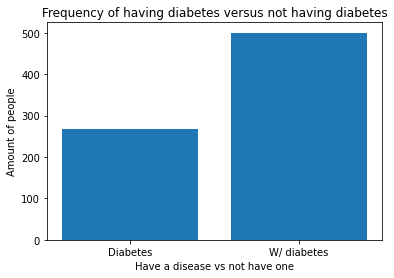

In [46]:
# 6. Create a bar chart to represent the frequencies of those with diabetes versus those without diabetes, 
# label the axes and name the chart.
not_diabetes = value_counts[0]
diabetes = value_counts[1]
diabetes_havers_labels = ['Diabetes', 'W/ diabetes']
plt.bar(diabetes_havers_labels, [diabetes, not_diabetes])
plt.title('Frequency of having diabetes versus not having diabetes')
plt.xlabel('Have a disease vs not have one')
plt.ylabel('Amount of people')
plt.show()

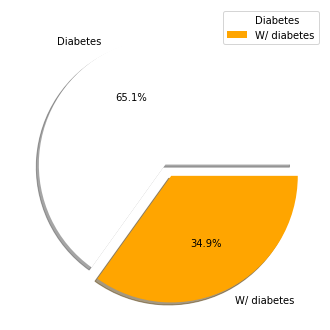

In [66]:
# 7.	Create a pie plot, change the colors, add the labels, add shade, and ‘explode’ the pie slice for those that have no diabetes. 
# Create the legend and put it into the right corner so that it does cover the pie plot. 
pie_colors = ['white', 'orange']
plt.pie(value_counts, labels=diabetes_havers_labels, colors=pie_colors, explode=[0, 0.1], shadow=True, autopct='%1.1f%%')
# matplotlib.rcParams['text.color'] = 'white'
plt.legend()
plt.legend(loc="upper right")
plt.subplots_adjust(left=0.01, bottom=0.001, right=0.75)
plt.show()

In [48]:
# 8. Calculate and report the mean the standard deviation of the BMI variable.
bmi_mean = dataset.BMI.mean()
bmi_std = dataset.BMI.std()
print('BMI mean: ' + str(bmi_mean))
print('BMI standard deviation: ' + str(bmi_std))

BMI mean: 31.992578124999998
BMI standard deviation: 7.884160320375446


In [53]:
# 9. By using the Chebysheffs Theorem infer what is the range for the BMI variable for 75% of the people in your dataset.
#  What is the range for 89% of the people in your dataset.
# 1) mean - (lower boundary) = within number
# 2) mean - (upper boundary) = within number
#  k - number of standard deviations
#  k = the within number / std 
wn75 = np.sqrt(1/(1 - 75/100)) * bmi_std
wn89 = np.sqrt(1/(1 - 89/100)) * bmi_std
print(wn75)
print('range for 75% is between '+ str(bmi_mean - wn75) + ' and ' + str(bmi_mean + wn75))
print(wn89)
print('range for 89% is between '+ str(bmi_mean - wn89) + ' and ' + str(bmi_mean + wn89))

15.768320640750892
range for 75% is between 16.224257484249108 and 47.76089876575089
23.771637790630525
range for 89% is between 8.220940334369473 and 55.76421591563052


BMI median = 32.0


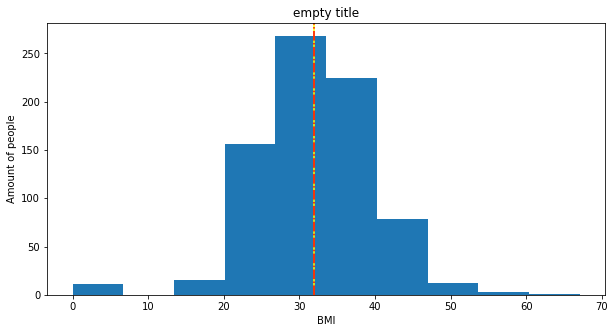

BMI skewness = -0.42898158845356543


61.458333333333336

In [75]:
# 10. Create a histogram for the BMI variable, plot the mean and meadian on the historgram to answer the following question:
# a)	Is the BMI distribution skewed based on the position of the mean versus the median?
# b)	Calculate the skewness of BMI
# c)	Based on the value of BMI median and on the chart below infer what percentage of people in your dataset are obese. (1.5pt)
# create histogram
# ax = dataset.groupby(by=['BMI']).max().plot.bar(legend = False)
# ax.set_ylabel('test label')
plt.hist(dataset.BMI)
plt.title('empty title')
plt.xlabel('BMI')
plt.ylabel('Amount of people')
bmi_median = np.median(dataset.BMI)
print('BMI median = '+str(bmi_median))
plt.axvline(bmi_mean, color='yellow', linestyle='-')
plt.axvline(bmi_median, color='red', linestyle='-.')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()
# a: it doesn't seem that much skewed based on any of these  variables
# b: skewness is negative, therefore there are tails on the left side
bmi_skewness = dataset.BMI.skew()
print('BMI skewness = '+str(bmi_skewness))
# c: 
# obese people are with bmi = 30 or higher
len(dataset.BMI[dataset.BMI >= 30])/(len(dataset.BMI) / 100)